## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [364]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' ,header=1)

In [365]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [366]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [367]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [368]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [370]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [371]:
df[['Region']]=df[['Region']].astype(int)

In [372]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [373]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [374]:
## Removing the null values
df=df.dropna().reset_index(drop=True)


In [375]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [376]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [377]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [378]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [379]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [380]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [381]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


#### Changes the required columns as integer data type

In [383]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [384]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [386]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


#### Changing the other columns to float data datatype


In [387]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [388]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [389]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [391]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [392]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [393]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [394]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

##  Exploratory Data Analysis

In [395]:
## drop day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [396]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [397]:
## categories in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [398]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [399]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [400]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [401]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [402]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

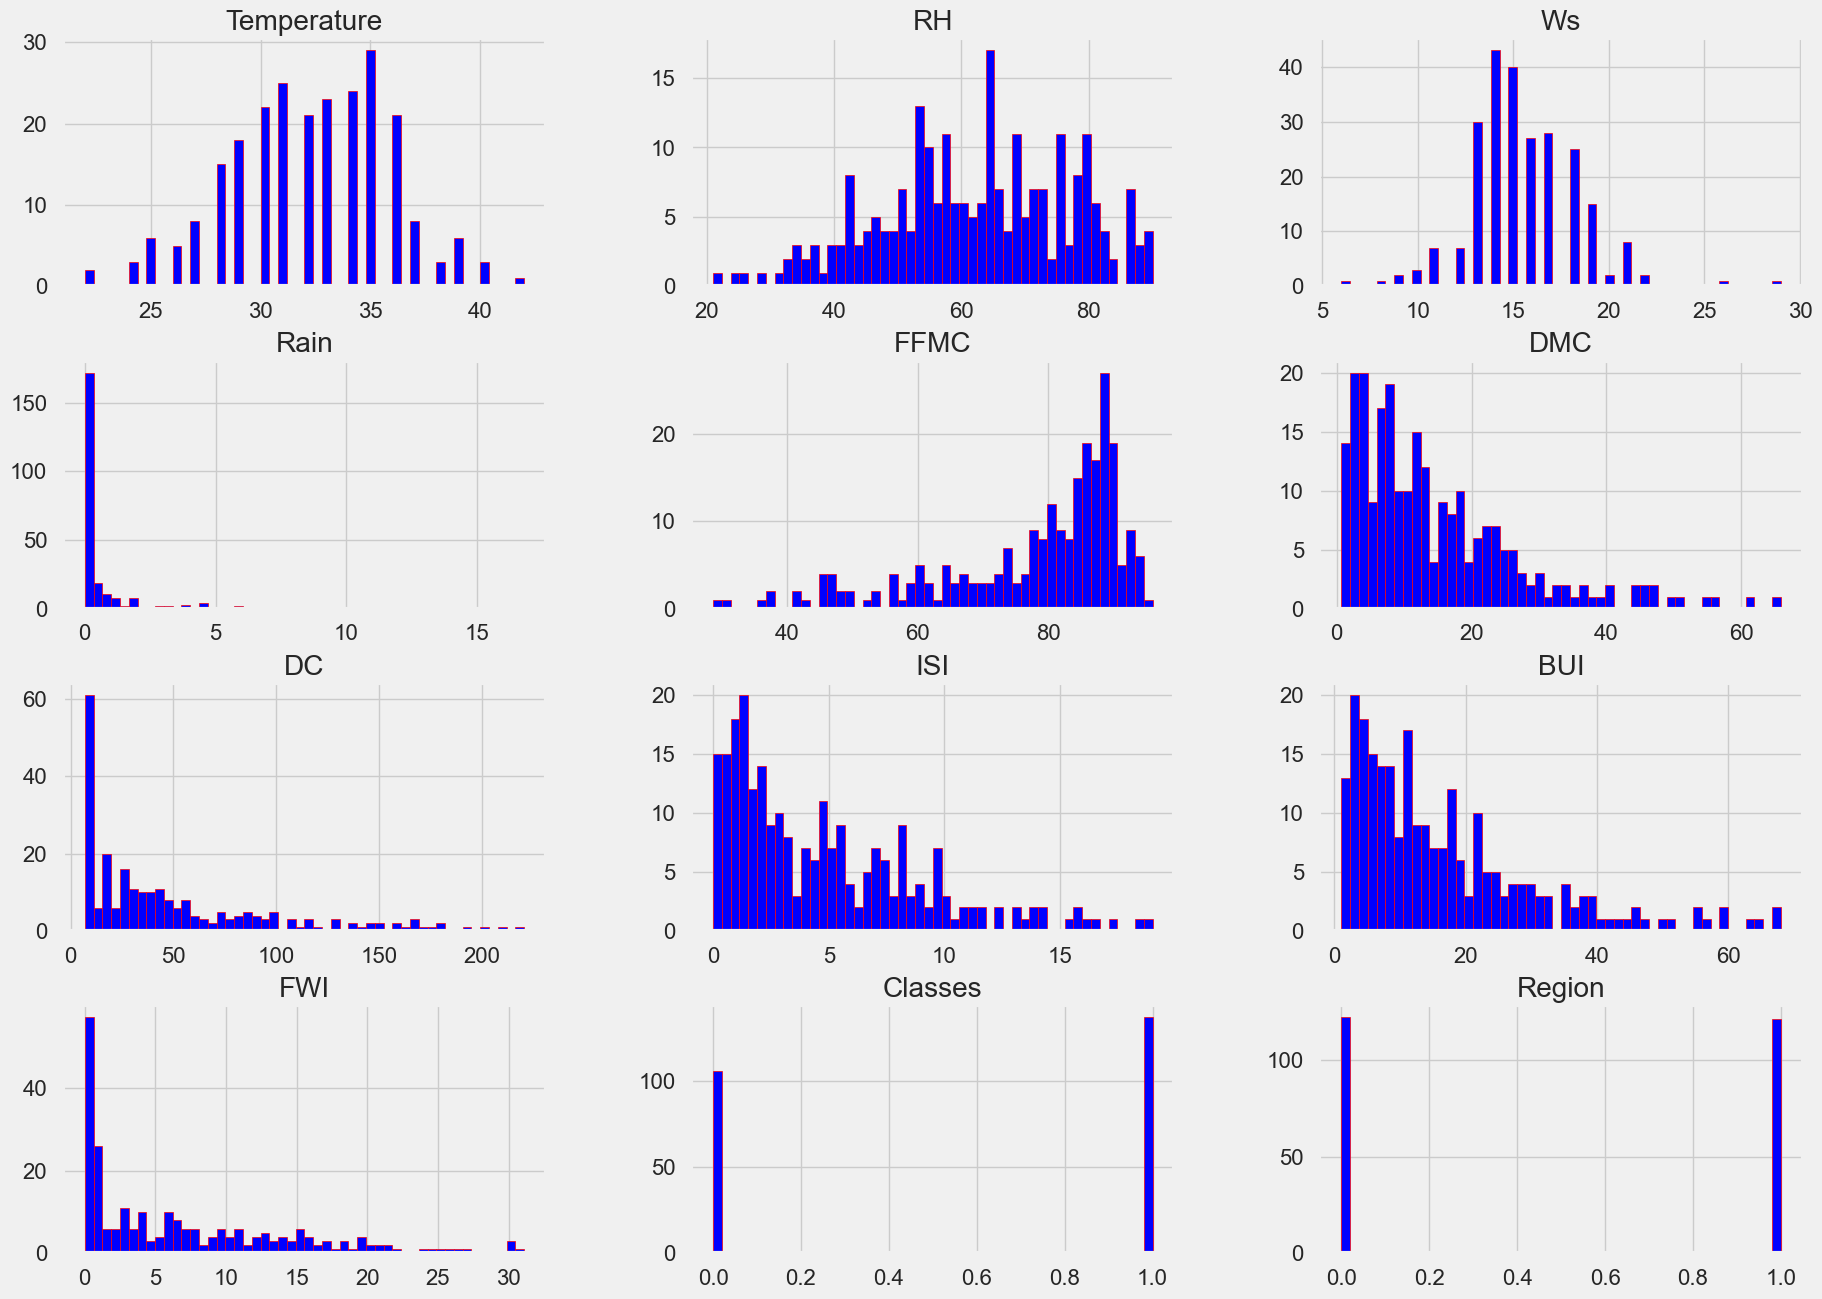

In [403]:
## Plot desnity plot for all features
plt.style.use('fivethirtyeight')
df_copy.hist(bins=50,figsize=(20,15), color='blue', edgecolor='r')
plt.show()

In [404]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

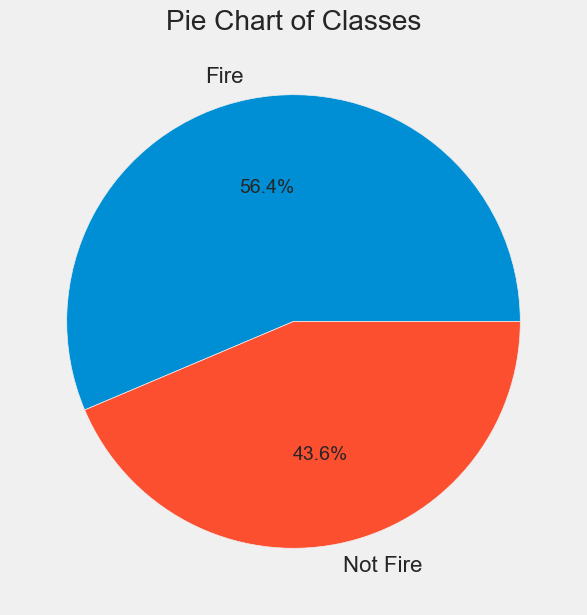

In [405]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

## Correlation

In [406]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

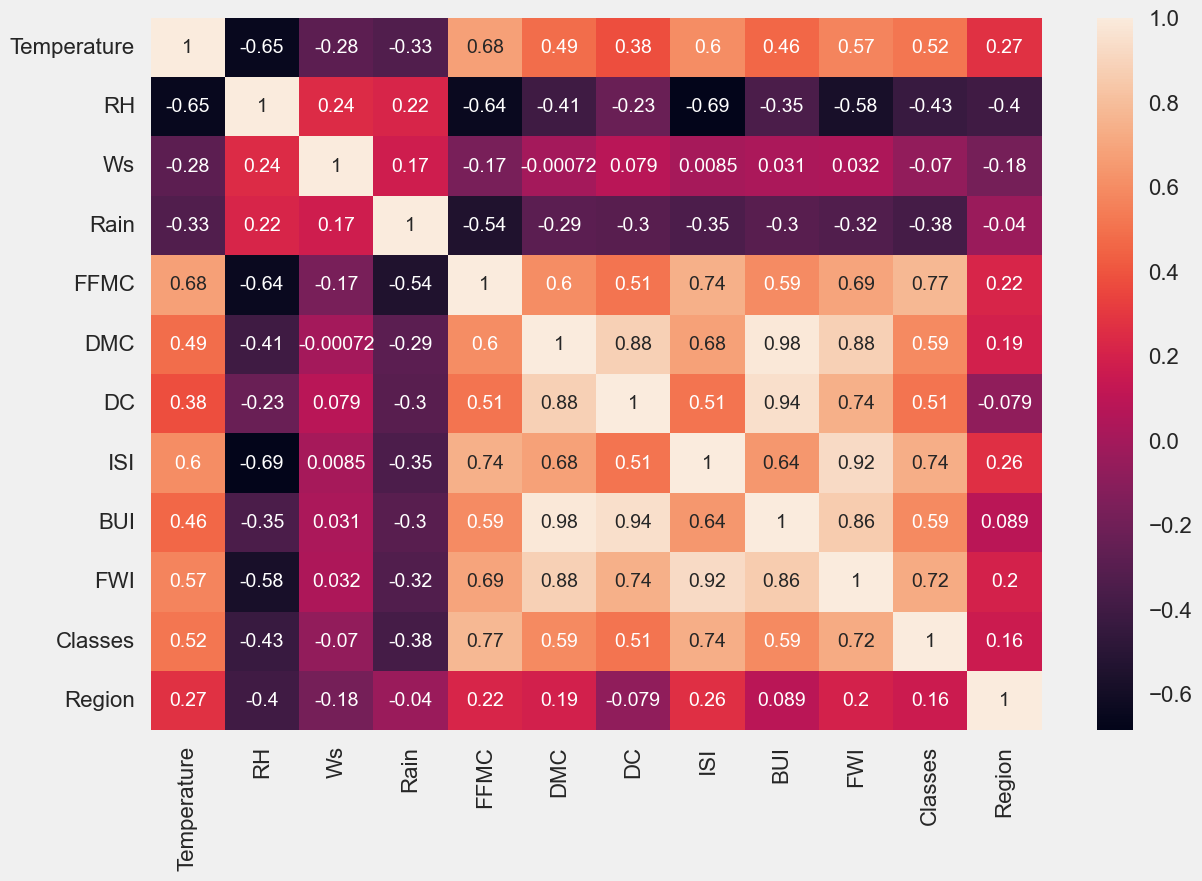

In [407]:
sns.heatmap(df_copy.corr(),annot=True)

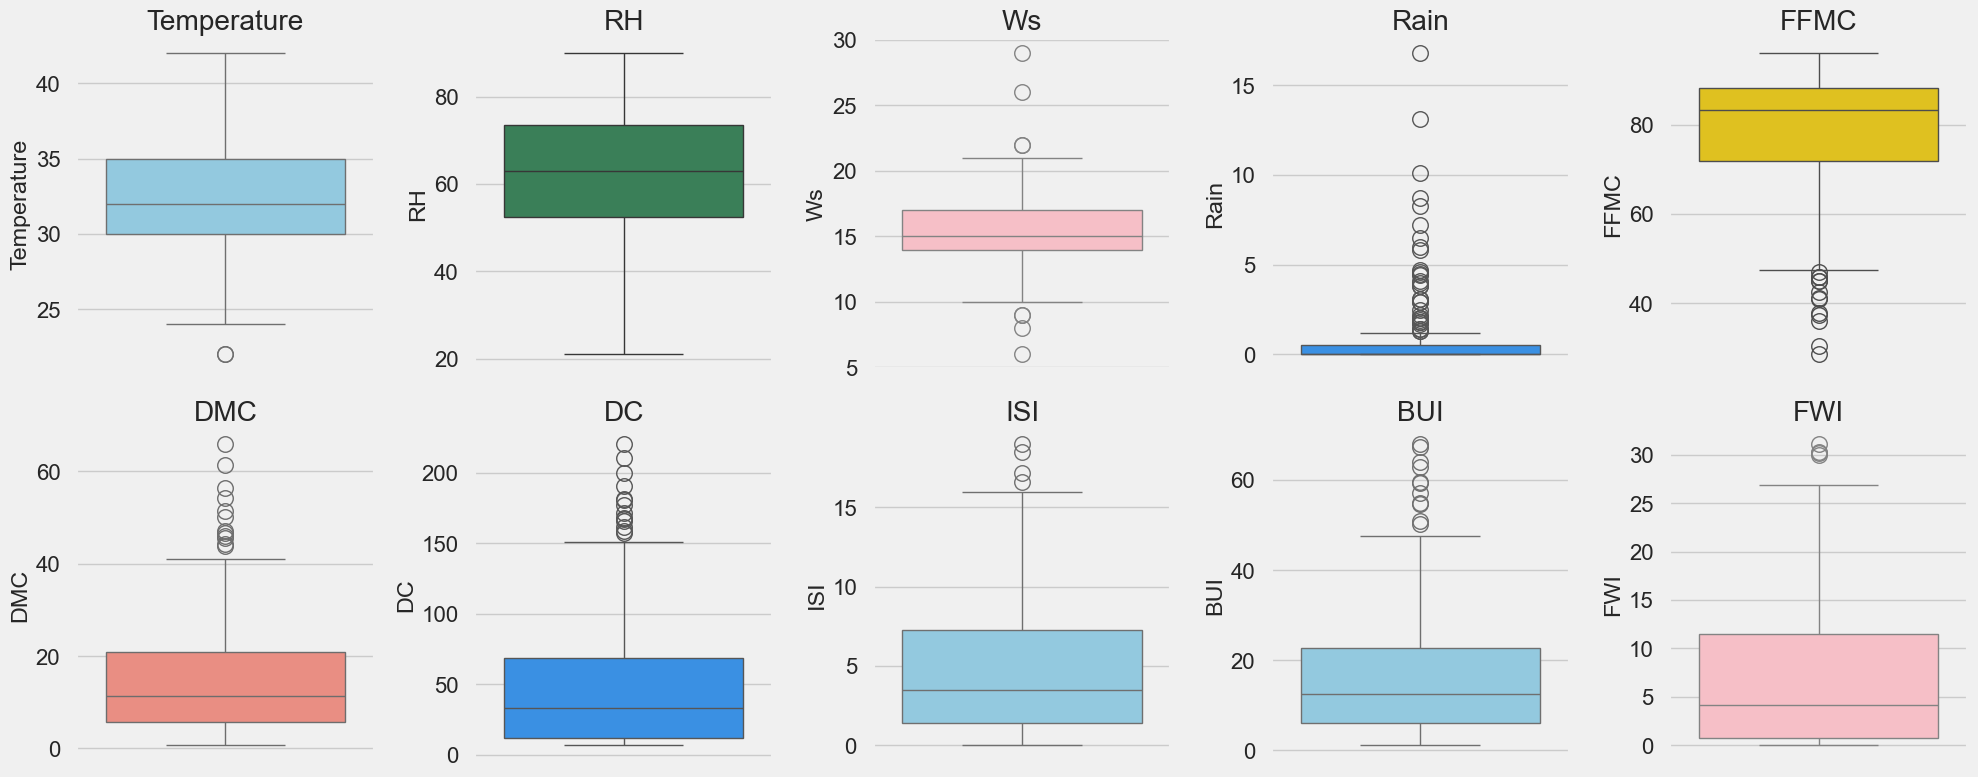

In [408]:
## Box Plots
columns = df_copy.columns
colors = ["skyblue",
"lightpink",
"seagreen",
"salmon",
"gold",
"dodgerblue"]
# Create the figure and axes
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through columns and plot boxplots on each axis
j = 0 # Counter for the axes array
for i, col in enumerate(columns):
    if col == 'Classes' or col == 'Region':
        continue
    # Plot on the current axis
    sns.boxplot(y=col, data=df_copy, color=np.random.choice(colors), orient='v', ax=axes[j]) # Use ax argument
    axes[j].set_title(col) # Set the title for the current axis

    j += 1 # Move to the next axis
# Remove any unused subplots if the number of columns to plot is less than nrows * ncols
for k in range(j, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [409]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [410]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

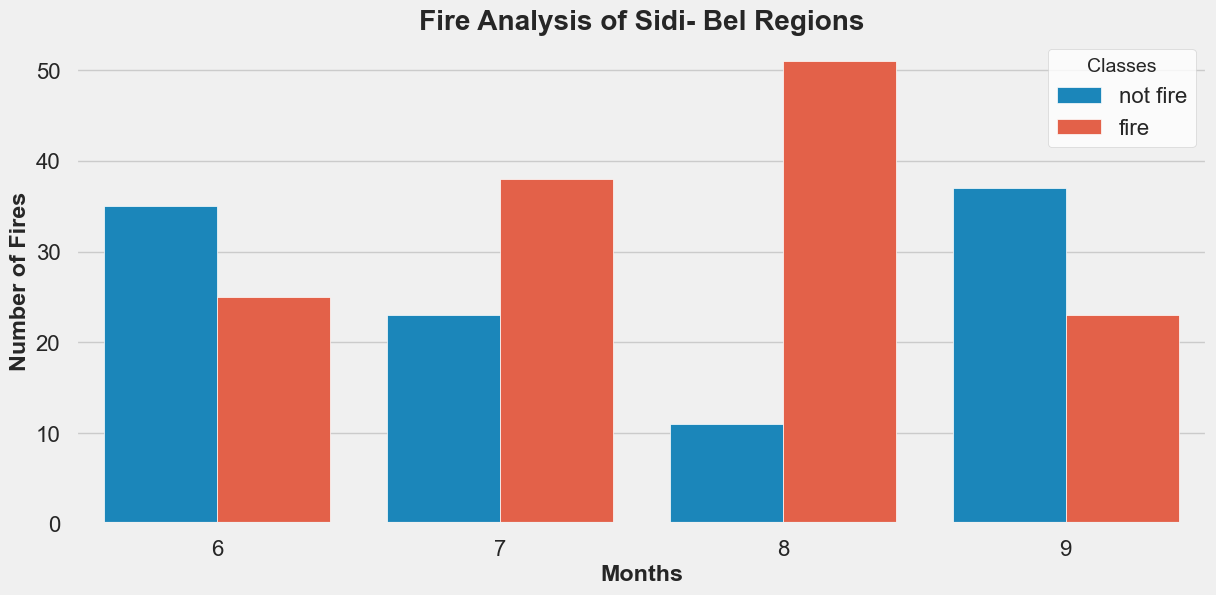

In [411]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

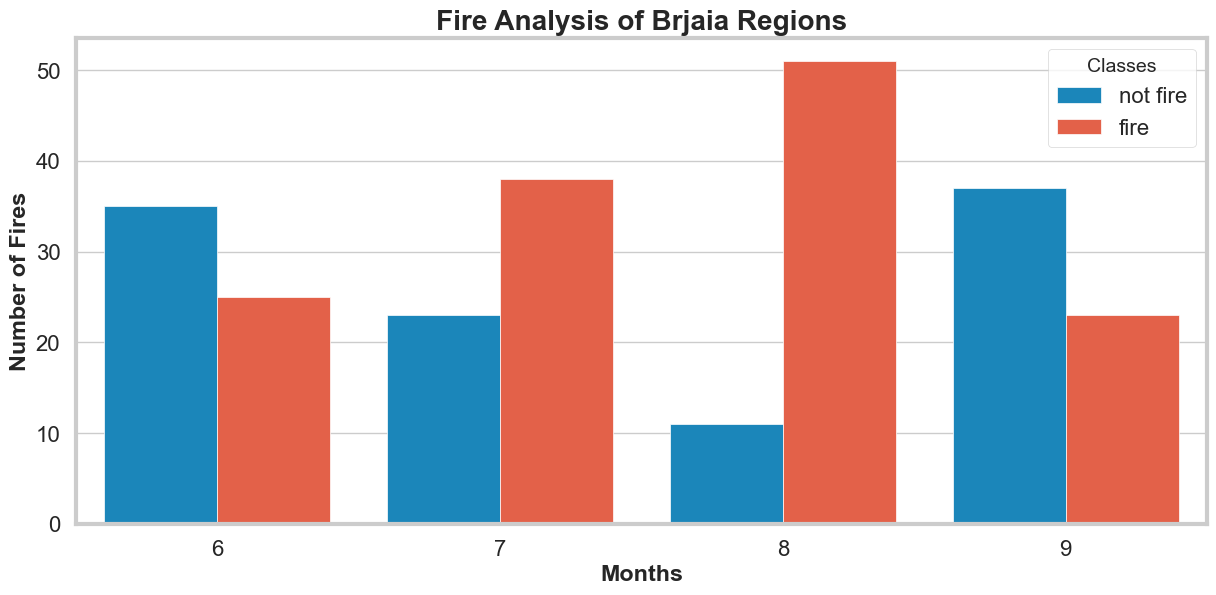

In [412]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

In [413]:
# Dropping the dependent variable so that we can train the model
X = df_copy.drop('FWI', axis=1)
y = df['FWI']
X.head(), y.head()

(   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
 0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
 1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
 2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
 3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
 4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0,
 0    0.5
 1    0.4
 2    0.1
 3    0.0
 4    0.5
 Name: FWI, dtype: float64)

In [414]:
# Model Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=34)

# Feature selection based on correlation
## we use correlation to drop features that are highly correlated because only one can be used since the other is redundant
### what will happen if i use 2 features that are highly correlated?
### -This will lead to multicollinearity, which can affect the stability and interpretability of the model coefficients.
#### -It can also lead to inflated standard errors, making it difficult to determine the individual effect of each feature on the target variable.
#### -Also it can lead to overfitting, where the model learns noise in the data rather than the underlying patterns.
#### -Also the rmse, mse etc. will be higher because the model will have two similar features that will be contributing to the prediction, leading to less generalization.

In [415]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659250,-0.277898,-0.253653,0.662887,0.445664,0.350883,0.608642,0.423989,0.494143,0.276826
RH,-0.659250,1.000000,0.257618,0.140447,-0.637819,-0.392125,-0.215959,-0.647173,-0.337315,-0.411941,-0.397003
Ws,-0.277898,0.257618,1.000000,0.084978,-0.162646,0.020198,0.090887,0.027110,0.050190,-0.051643,-0.193785
Rain,-0.253653,0.140447,0.084978,1.000000,-0.495659,-0.301007,-0.305693,-0.366475,-0.312026,-0.390864,0.076540
FFMC,0.662887,-0.637819,-0.162646,-0.495659,1.000000,0.598802,0.501779,0.746367,0.586849,0.769279,0.202539
DMC,0.445664,-0.392125,0.020198,-0.301007,0.598802,1.000000,0.885590,0.680045,0.982530,0.580396,0.169763
DC,0.350883,-0.215959,0.090887,-0.305693,0.501779,0.885590,1.000000,0.510338,0.946470,0.504436,-0.097324
ISI,0.608642,-0.647173,0.027110,-0.366475,0.746367,0.680045,0.510338,1.000000,0.645212,0.750239,0.239321
BUI,0.423989,-0.337315,0.050190,-0.312026,0.586849,0.982530,0.946470,0.645212,1.000000,0.582032,0.063601
Classes,0.494143,-0.411941,-0.051643,-0.390864,0.769279,0.580396,0.504436,0.750239,0.582032,1.000000,0.147434


(2,
 Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
        'Classes', 'Region'],
       dtype='object'),
 <Axes: >)

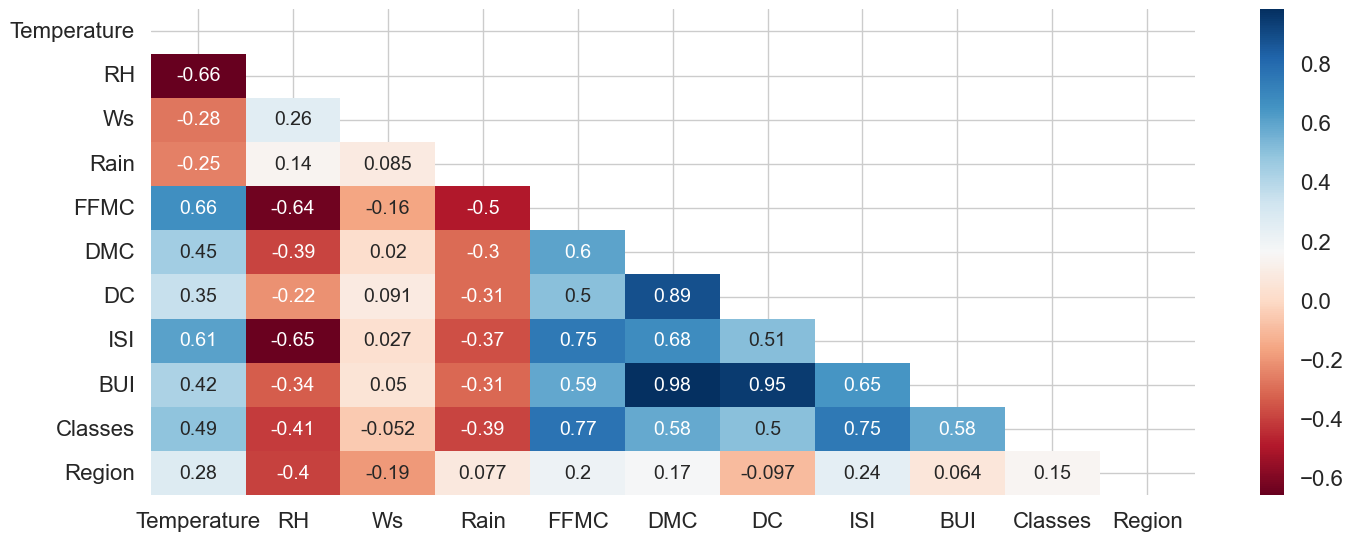

In [416]:
corrmat = X_train.corr()
plt.figure(figsize=(15,6))
cmap = ['plasma', 'viridis', 'magma', 'inferno', 'cividis', 'coolwarm', 'summer', 'Blues','Greens','Reds','YlGnBu','YlOrRd','bwr','seismic','RdBu',
'RdGy','BrBG','PiYG']  # You can choose any colormap you like
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool)) # Or np.tril() for the lower triangle
corrmat.ndim,corrmat.columns, sns.heatmap(corrmat, annot=True, cmap= np.random.choice(cmap), mask=mask)


In [417]:
# Feature selection based on correlation
# Only applies to the lower trinagle
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [418]:
# Threshold by domain expertise
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [419]:
X_train.shape

(182, 11)

In [420]:
# Dropping the correlated features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)


In [443]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 9), (61, 9), (182,), (61,))

## Feature Scaling or Standardizaion

In [422]:
from sklearn.preprocessing import  StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_7152\785062453.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


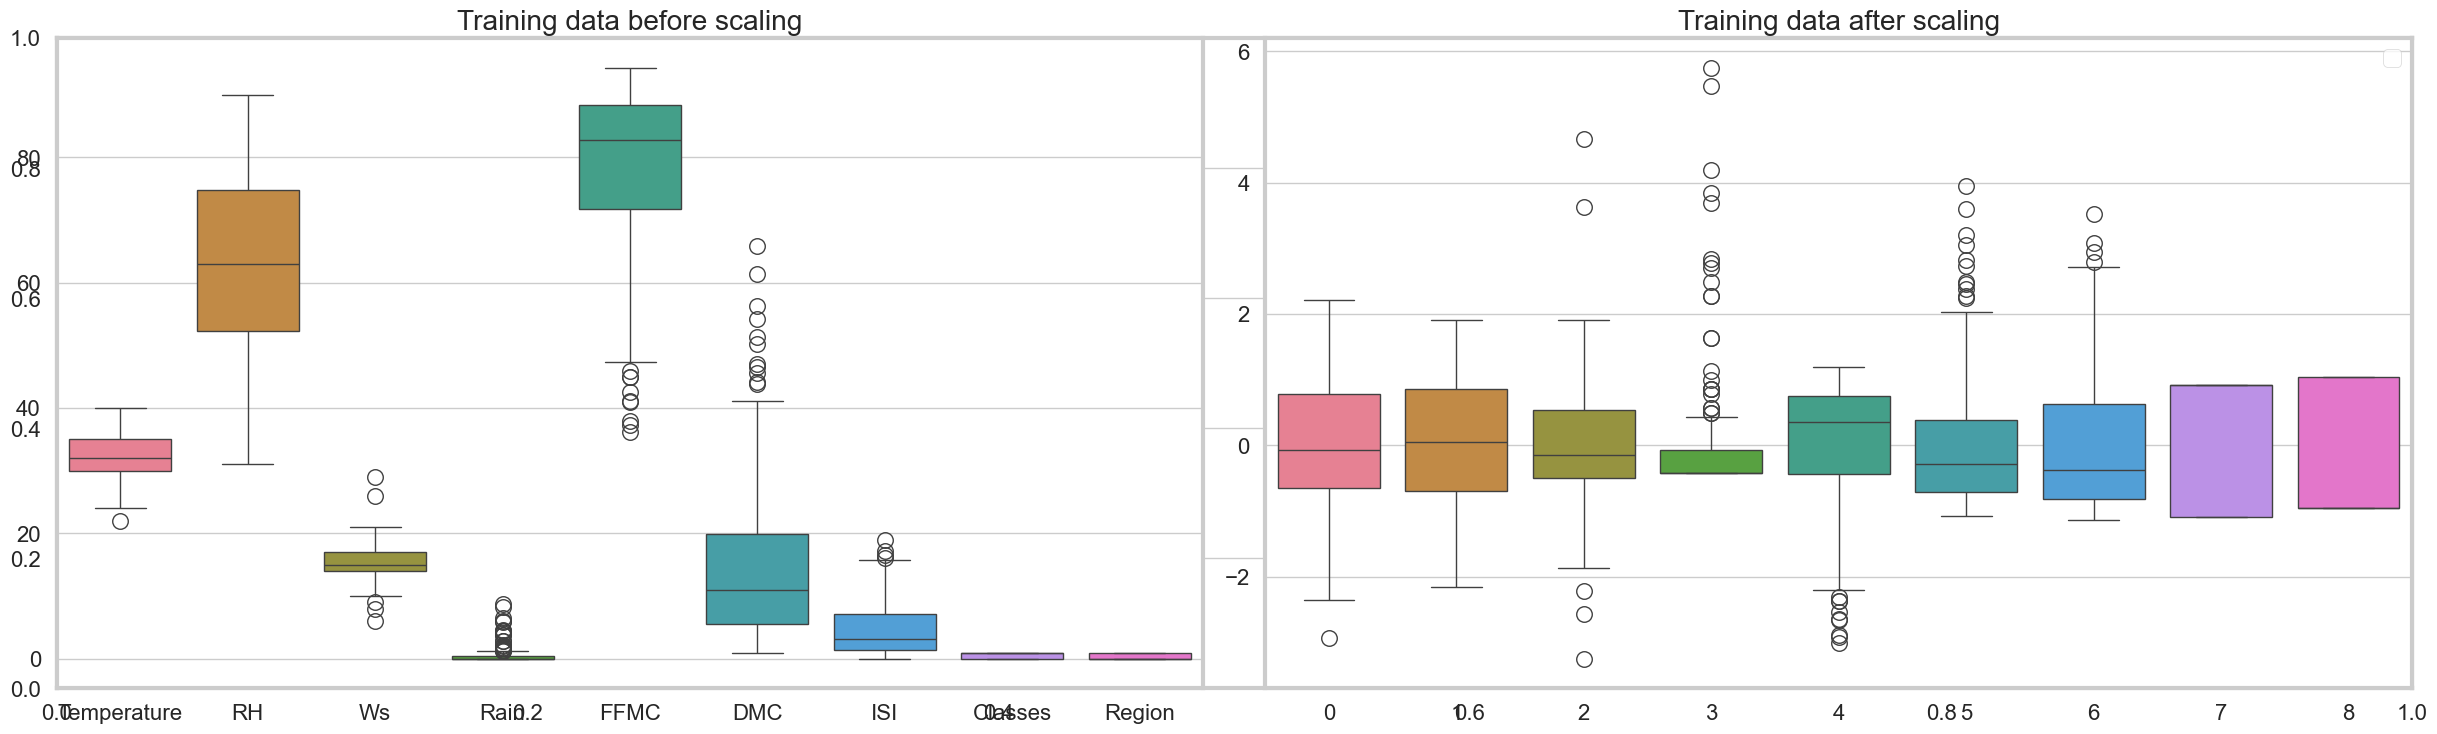

In [434]:
# Boxplots to understand the effect of standardization
plt.subplots(figsize=(25,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Training data before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Training data after scaling')
plt.tight_layout()
plt.legend()
plt.show()

## Applying Linear Regression

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,mean_squared_error, r2_score
# Applying Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg

LinearRegression()

In [436]:
y_pred = linreg.predict(X_test_scaled)

In [441]:
# Claculating the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{linreg.coef_}')
print(f'Intercept:{linreg.intercept_}')

The Mean Absolute Error is: 0.7433926086770395
The Root Mean Squared Error is: 1.0507258033754523
The Mean Squared Error is: 1.1040247138789898
The R2 Score is: 0.9792741570653651
Adjusted r2 score:0.9756166553710178
Coefficient:[ 0.11244722 -0.15674304  0.0763409   0.03965325 -0.83916046  3.79379632
  4.38665633  0.55108019 -0.45457698]
Intercept:6.9423076923076925


In [449]:
# # Ploting the linear regression model
# plt.figure(figsize=(20,8))
# plt.scatter(X_train_scaled, linreg.predict(X_train_scaled), color='blue', label='Training data')
# plt.plot(X_test, y_pred, color='red', label='Regression line')
# plt.legends()
# plt.title('Linear Regression model')
# plt.show()

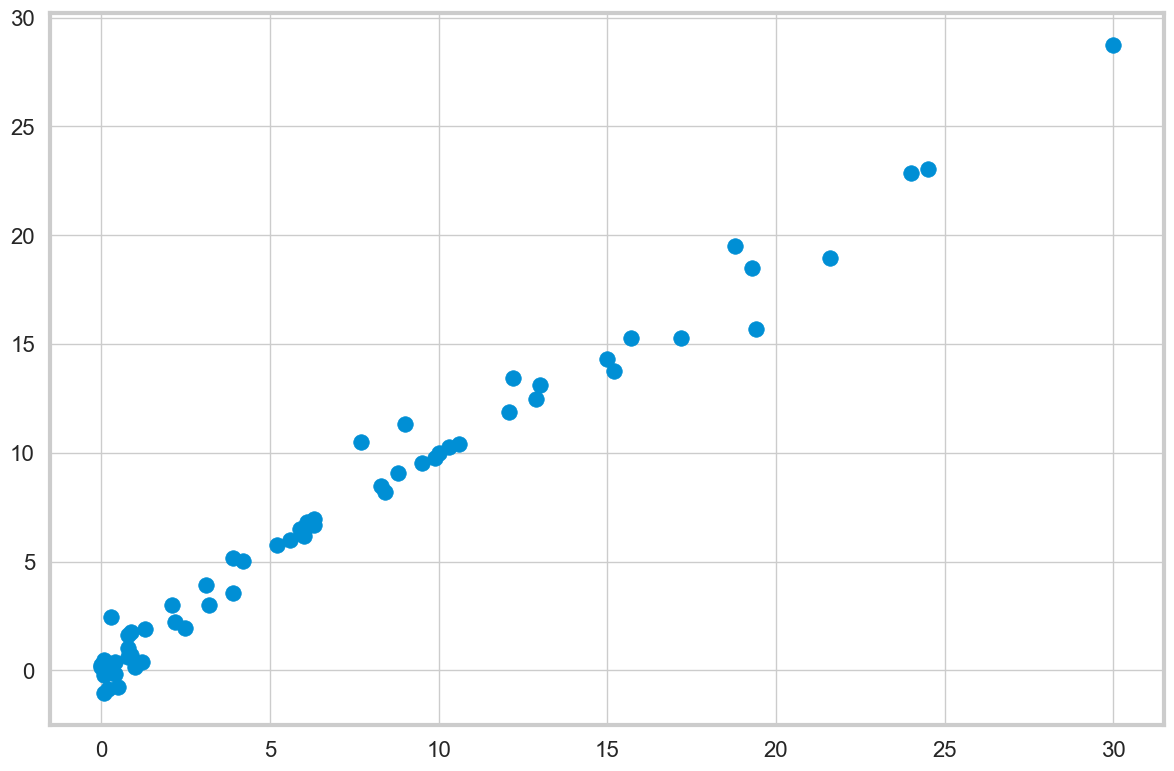

In [450]:
plt.scatter(y_test,y_pred)

## Lasso Regression

In [451]:
from sklearn.linear_model import Lasso
lasso = Lasso()

#Fitting the model in lasso
lasso.fit(X_train_scaled, y_train)


Lasso()

In [452]:
# Predicting the values
y_pred_lasso = lasso.predict(X_test_scaled)


The Mean Absolute Error is: 1.1986159476339322
The Root Mean Squared Error is: 1.6588535858586317
The Mean Squared Error is: 2.751795219316041
The R2 Score is: 0.9483405807978365
Adjusted r2 score:0.939224212703337
Coefficient:[ 0.         -0.          0.         -0.          0.          3.11147367
  3.68641435  0.         -0.        ]
Intercept:6.9423076923076925


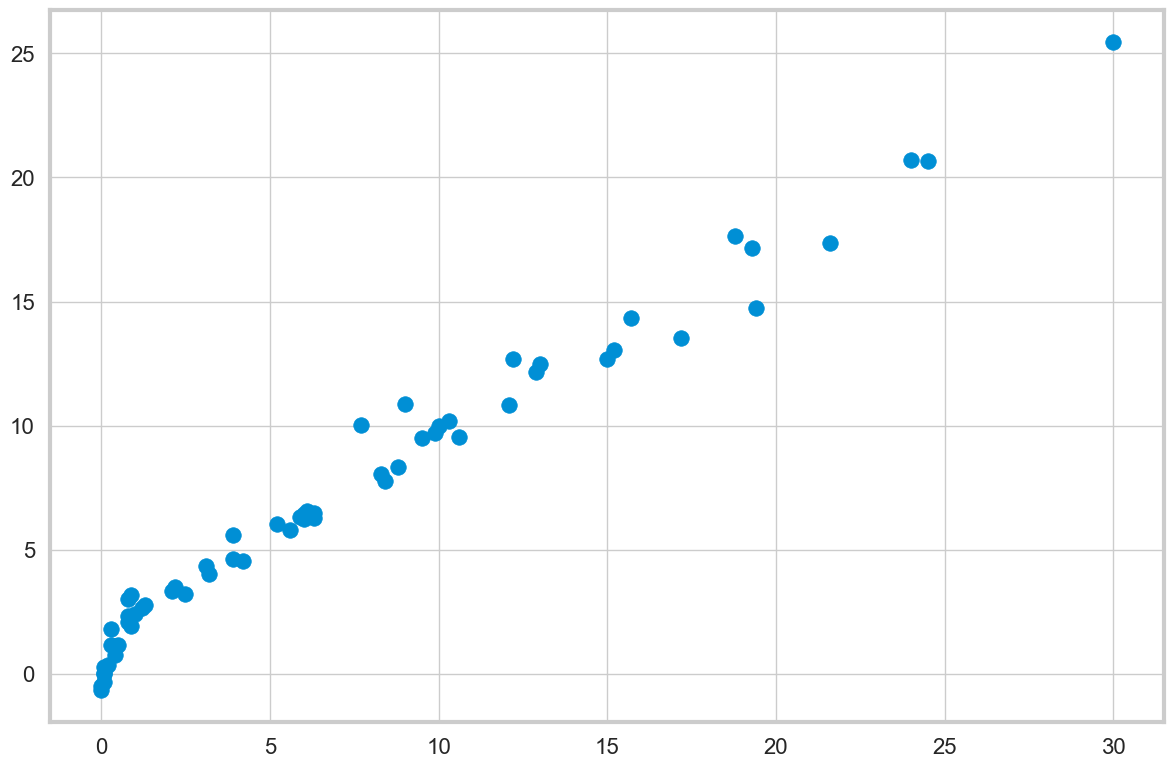

In [454]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_lasso)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_lasso)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_lasso)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{lasso.coef_}')
print(f'Intercept:{lasso.intercept_}')
plt.scatter(y_test, y_pred_lasso)

## Lasso CV

In [455]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=33)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5, random_state=33)

In [456]:
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)



The Mean Absolute Error is: 0.7277254673437813
The Root Mean Squared Error is: 1.042211513980909
The Mean Squared Error is: 1.0862048398743782
The R2 Score is: 0.979608689349916
Adjusted r2 score:0.976010222764607
Coefficient:[ 0.0884008  -0.11747479  0.0650109   0.03838486 -0.75257341  3.77710027
  4.39490666  0.50149643 -0.43345724]
Intercept:6.9423076923076925


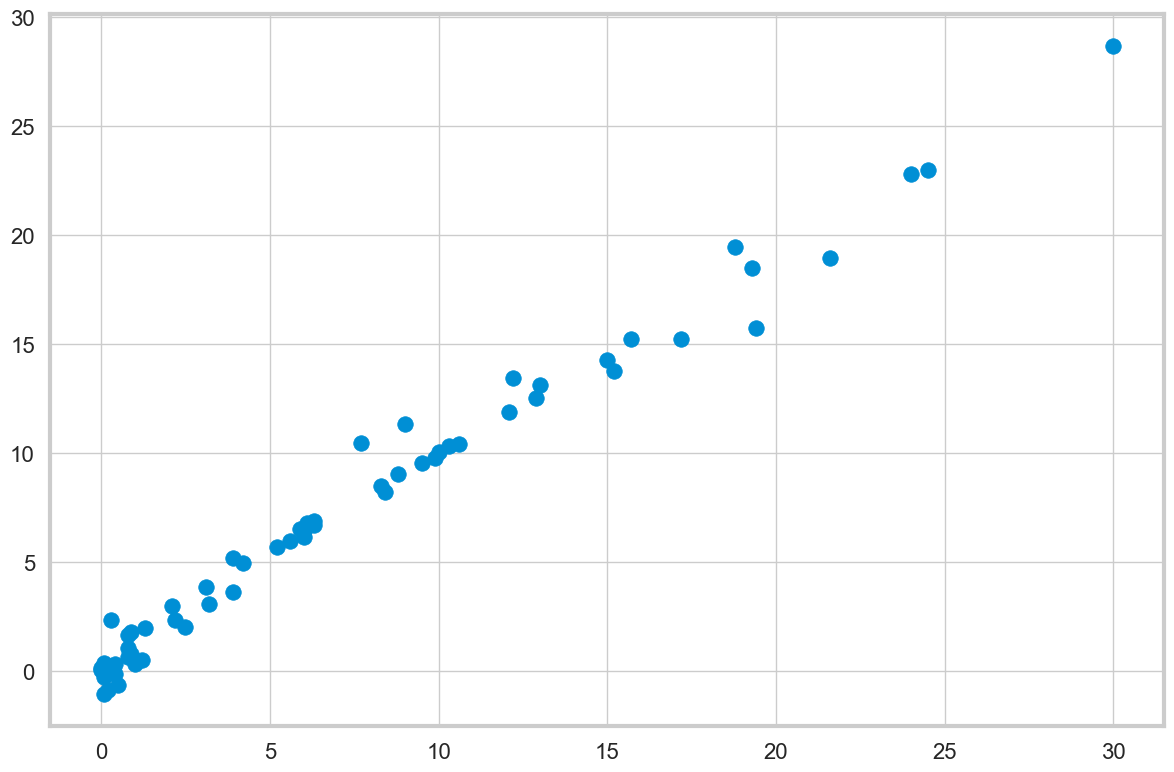

In [457]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_lasso_cv)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_lasso_cv)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_lasso_cv)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_lasso_cv)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_lasso_cv)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{lasso_cv.coef_}')
print(f'Intercept:{lasso_cv.intercept_}')
plt.scatter(y_test, y_pred_lasso_cv)

## Ridge Regression

In [458]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_rigde = ridge.predict(X_test_scaled)


The Mean Absolute Error is: 0.755562455247665
The Root Mean Squared Error is: 1.0706944007529988
The Mean Squared Error is: 1.1463864998038231
The R2 Score is: 0.978478899757742
Adjusted r2 score:0.97468105853852
Coefficient:[ 0.1201596  -0.17567845  0.09426623  0.03589326 -0.80191298  3.77649422
  4.30890483  0.57443889 -0.44745253]
Intercept:6.9423076923076925


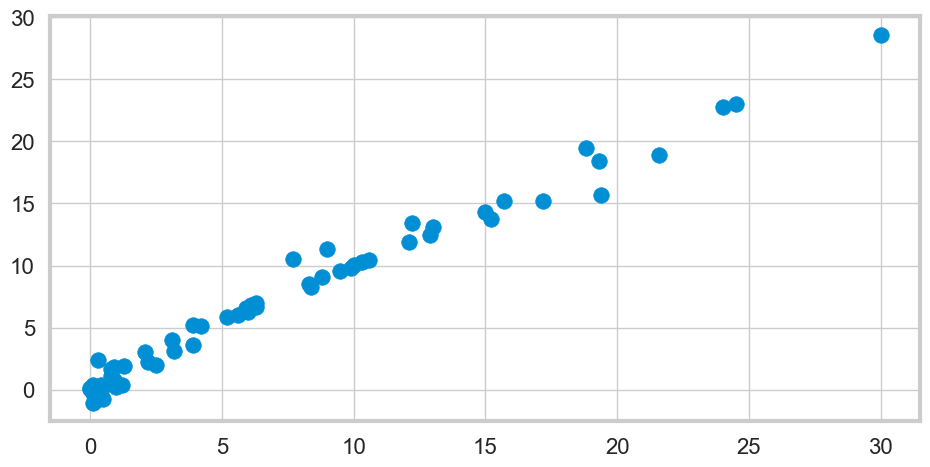

In [462]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_rigde)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_rigde)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_rigde)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_rigde)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_rigde)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{ridge.coef_}')
print(f'Intercept:{ridge.intercept_}')
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rigde)

## Ridge CV

In [461]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)


The Mean Absolute Error is: 0.755562455247665
The Root Mean Squared Error is: 1.0706944007529988
The Mean Squared Error is: 1.1463864998038231
The R2 Score is: 0.978478899757742
Adjusted r2 score:0.97468105853852
Coefficient:[ 0.1201596  -0.17567845  0.09426623  0.03589326 -0.80191298  3.77649422
  4.30890483  0.57443889 -0.44745253]
Intercept:6.9423076923076925


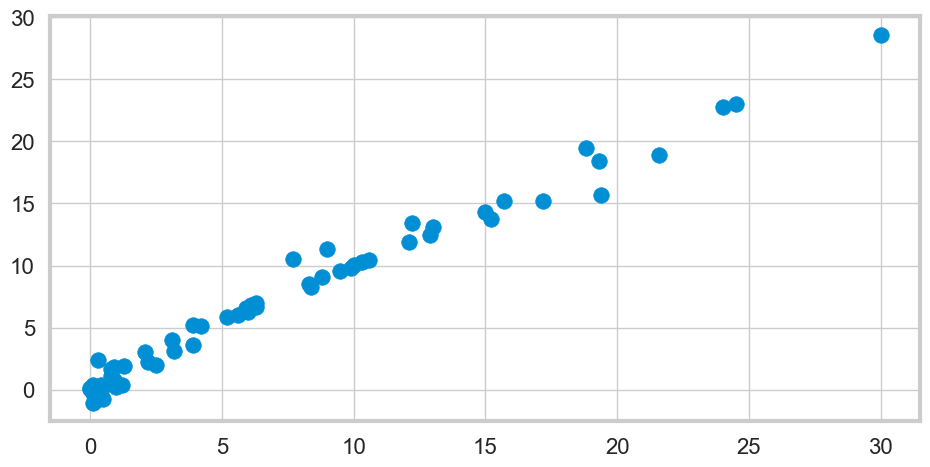

In [463]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_ridge_cv)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_ridge_cv)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_ridge_cv)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_ridge_cv)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_ridge_cv)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{ridge_cv.coef_}')
print(f'Intercept:{ridge_cv.intercept_}')
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_ridge_cv)

## ElasticNet 

In [464]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred_elasticnet = elastic_net.predict(X_test_scaled)

The Mean Absolute Error is: 1.8579584325217628
The Root Mean Squared Error is: 2.5280391873050907
The Mean Squared Error is: 6.3909821325501825
The R2 Score is: 0.8800221677901573
Adjusted r2 score:0.858849609164891
Coefficient:[ 0.1201596  -0.17567845  0.09426623  0.03589326 -0.80191298  3.77649422
  4.30890483  0.57443889 -0.44745253]
Intercept:6.9423076923076925


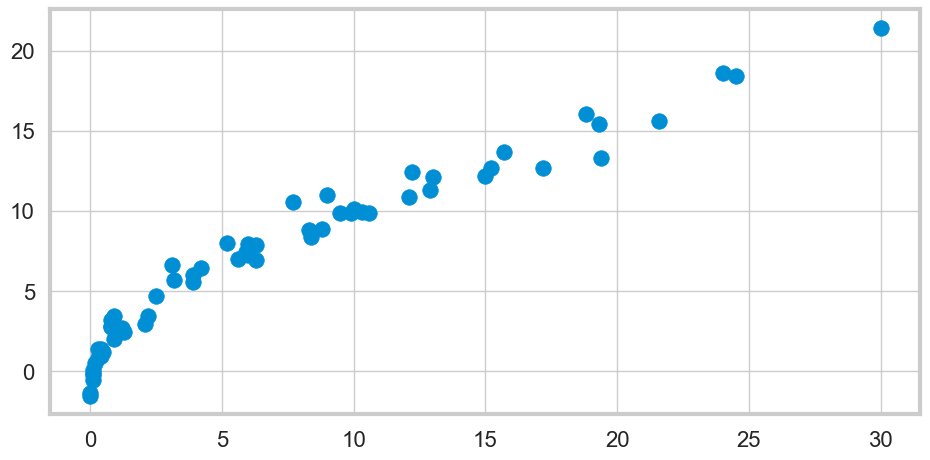

In [467]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_elasticnet)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_elasticnet)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_elasticnet)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_elasticnet)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_elasticnet)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{ridge_cv.coef_}')
print(f'Intercept:{ridge_cv.intercept_}')
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_elasticnet)

## ElasticNet CV

In [466]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)
y_pred_elasticnet_cv = elastic_net_cv.predict(X_test_scaled)

The Mean Absolute Error is: 0.7769433211627254
The Root Mean Squared Error is: 1.0999649453665505
The Mean Squared Error is: 1.2099228810352385
The R2 Score is: 0.9772861320221262
Adjusted r2 score:0.973277802378972
Coefficient:[ 0.10009241 -0.15368652  0.10656911  0.02627406 -0.62996563  3.72529079
  4.19658352  0.5465344  -0.40702314]
Intercept:6.9423076923076925


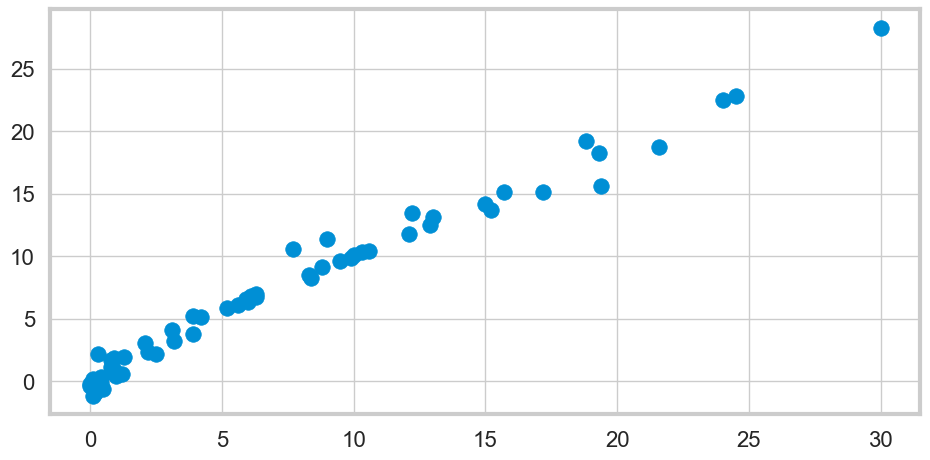

In [468]:
# calculaing the error metrics
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_elasticnet_cv)}')
print(f'The Root Mean Squared Error is: {root_mean_squared_error(y_test, y_pred_elasticnet_cv)}')
print(f'The Mean Squared Error is: {mean_squared_error(y_test, y_pred_elasticnet_cv)}')
print(f'The R2 Score is: {r2_score(y_test, y_pred_elasticnet_cv)}')

# Calculating the adjusted r2 score
adjusted_r2_score = 1 - (1-(r2_score(y_test, y_pred_elasticnet_cv)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted r2 score:{adjusted_r2_score}')

# Getting the coeff and intercept
print(f'Coefficient:{elastic_net_cv.coef_}')
print(f'Intercept:{elastic_net_cv.intercept_}')
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_elasticnet_cv)

## Best Accuracy
#### Currently LassoCV is giving the best accuracy so we will pickle that model

In [469]:
import pickle
pickle.dump(scalar, open('scalar.pkl', 'wb'))
pickle.dump(lasso_cv, open('lassoCV.pkl', 'wb'))

# Creating the WebApp

In [470]:
!pip install flask

  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
